In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

from settings import Settings
from dataloader_ml import DataHandler
import json
import matplotlib.pyplot as plt

# Load configuration using the Settings class
settings = Settings(
    default_config="default.toml",
    project_config="xenium.toml"
)

print(f"Project: {settings.get('general.name')}")
print(f"Base path: {settings.get('data.base_path')}")
print(f"Model folder: {settings.get('data.model_folder')}")

# Create necessary directories
settings.create_directories()

Project: Xenium_Segmagic
Base path: S:\NL\all\AG Blum\Annemarie\Xenium\Annotation
Model folder: S:\NL\all\AG Blum\Annemarie\Xenium\Annotation\models


### Loading and splitting data

In [2]:
data = DataHandler(settings)
data.train_test_split(test_ratio=0.1, valid_ratio=0.2)
distribution = data.run_data_loader()

with open(settings.get('data.model_folder')+"/distribution.json", 'w') as f:    
    json.dump(distribution, f, indent=4)

Loading data:   0%|          | 0/6 [00:00<?, ?it/s]

split into training: 4, valid: 1, and testing: 1
Training data:
0: 0052315__CCI_5w-98-L4.ome.tif
1: 0052315__CCI_5w-90-L4.ome.tif
2: 0052315__CCI_1w-82-L5.ome.tif
3: 0052315__naive-108-L4.ome.tif
Validation data:
0: 0052315__naive-101-L4.ome.tif
Test data:
0: 0052315__CCI_1w-80-L4.ome.tif
Kernel size: 512


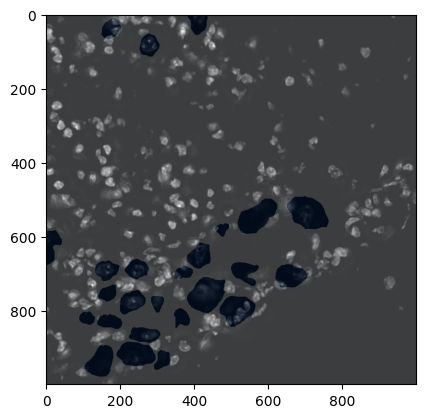

In [3]:
plt.imshow(data.train_data[0].regions[0]['image'][0,:,:], cmap='gray')
plt.imshow(data.train_data[0].regions[0]['mask'][0,:,:], cmap='Blues',alpha=0.25)
plt.show()

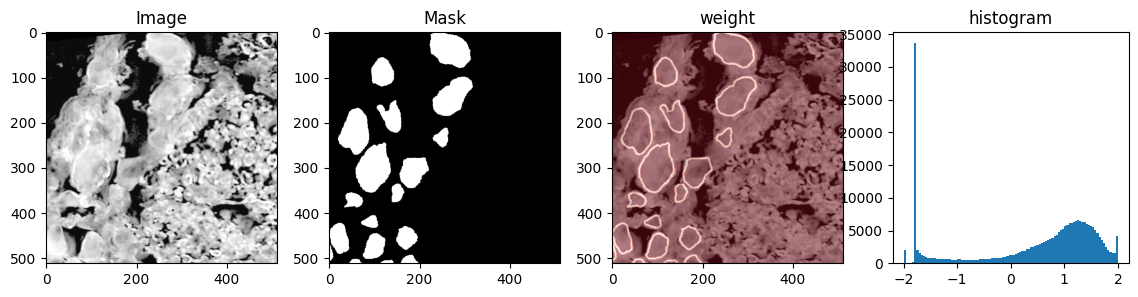

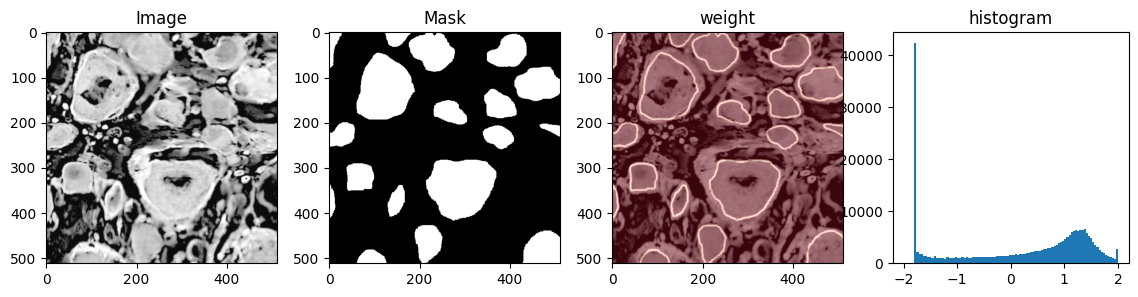

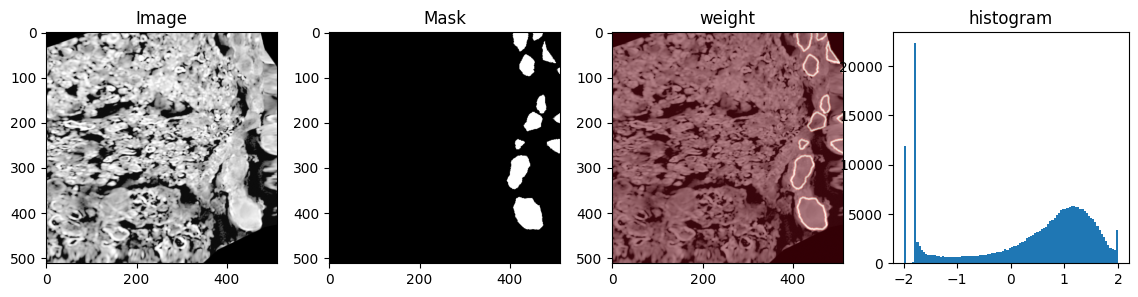

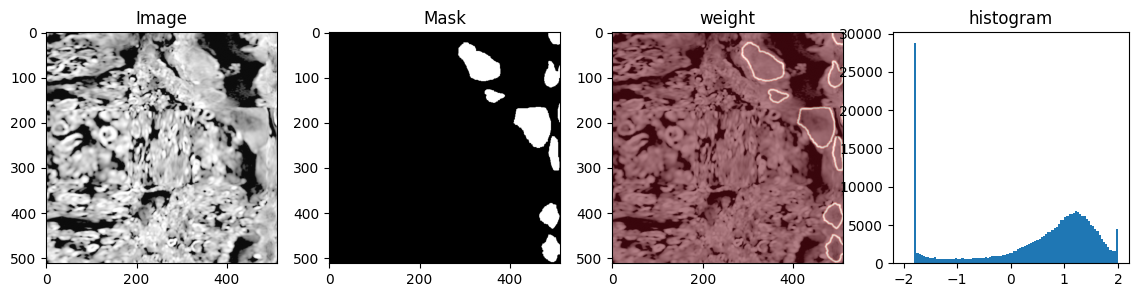

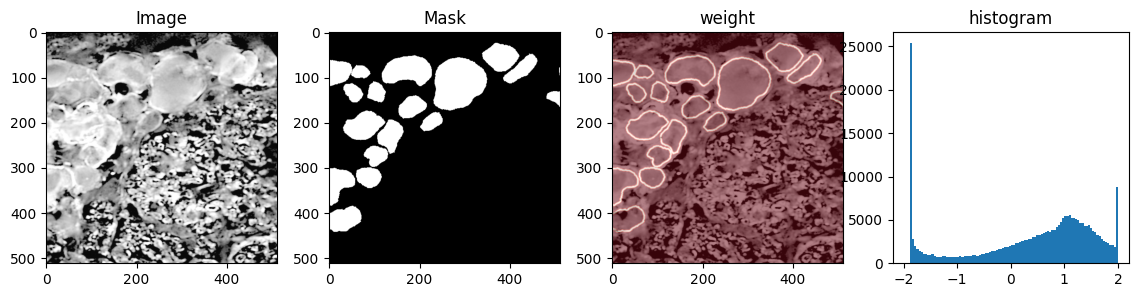

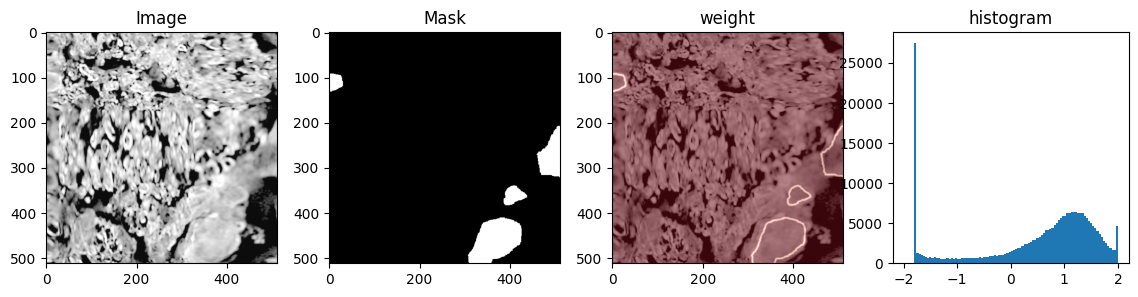

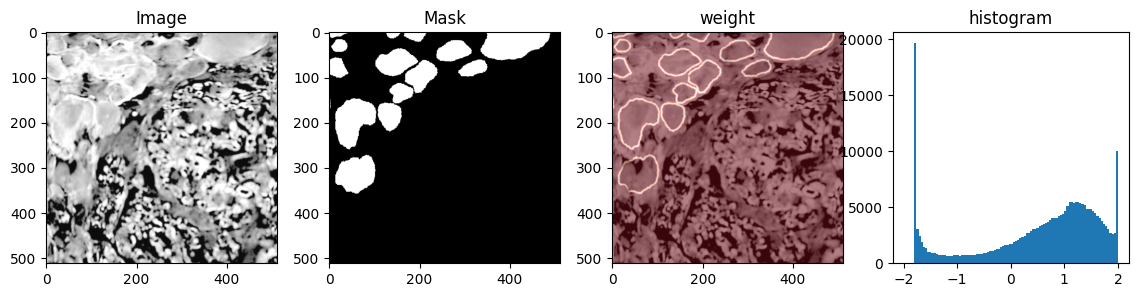

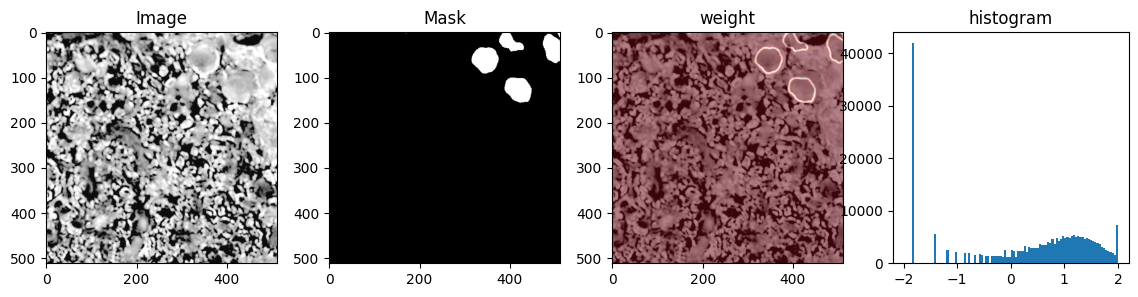

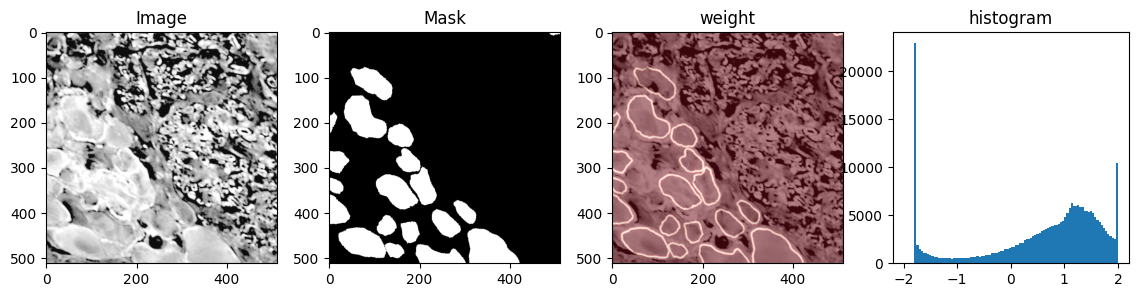

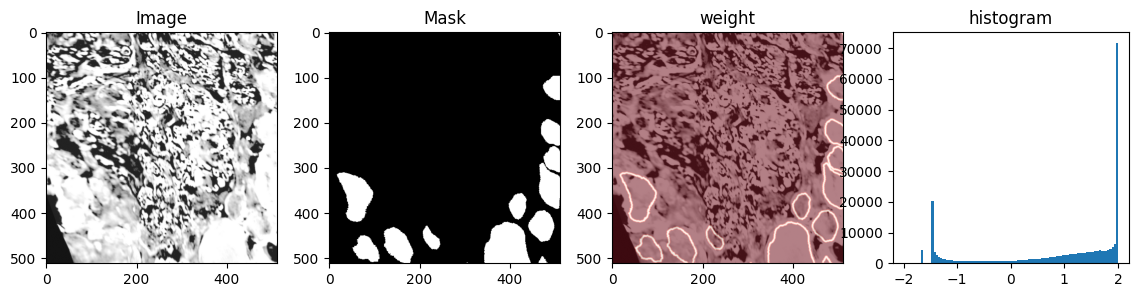

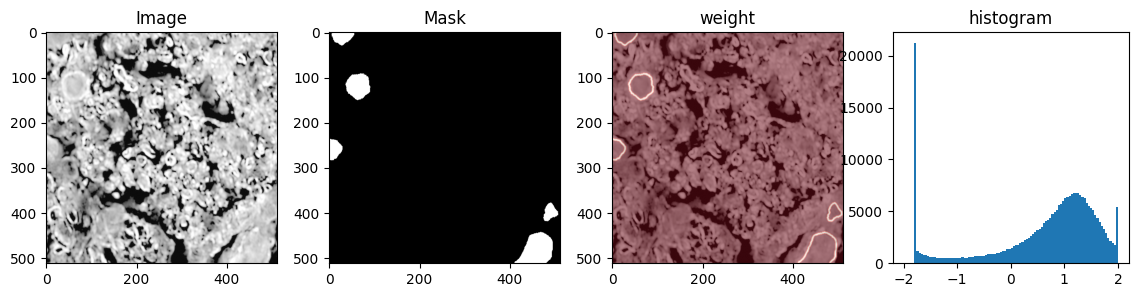

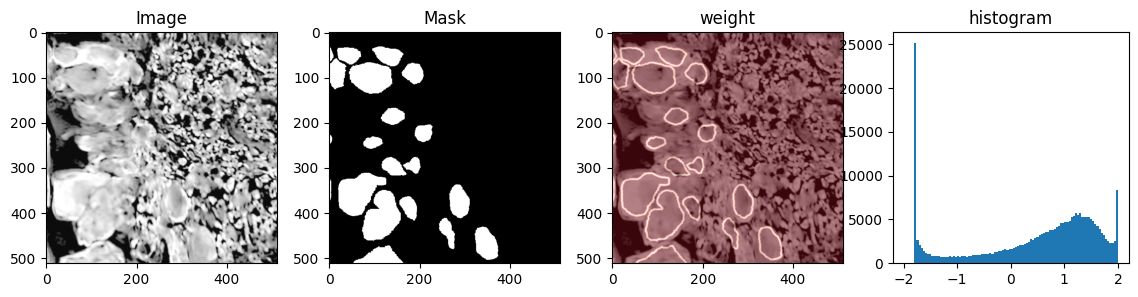

In [5]:
image, mask, weights = data.show_example_batch()

for index in range(0, image.shape[0]):
    plt.figure(figsize=(14, 3))
    plt.subplot(1, 4, 1)
    plt.title("Image")
    plt.imshow(image[index, 1, :], cmap='gray', vmin=-2, vmax=2)
    plt.subplot(1, 4, 2)
    plt.title("Mask")
    plt.imshow(mask[index, 0, :], cmap='gray')
    plt.subplot(1, 4, 3)
    plt.title("weight")
    plt.imshow(image[index, 1, :], cmap='gray', vmin=-2, vmax=2)
    plt.imshow(weights[index, 0, :], cmap='Reds', alpha=0.5)
    plt.subplot(1, 4, 4)
    plt.title("histogram")
    plt.hist(image[index, 1, :].flatten(), bins=100, range=(-2, 2))
    plt.show()
    plt.close()

### Training model
#### you will find the best model and its metrices in 'base_path'/model

In [6]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
seg.train_model(
    data
)

wandb: Currently logged in as: anmschulte (neu-sci) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Using 16bit Automatic Mixed Precision (AMP)
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Schulte_A\AppData\Local\anaconda3\envs\segmagic\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type        | Par

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

c:\Users\Schulte_A\AppData\Local\anaconda3\envs\segmagic\Lib\site-packages\pytorch_lightning\loops\fit_loop.py:310: The number of training batches (21) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 1 for best soft validation F1: 0.06856296211481094


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 2 for best soft validation F1: 0.4120848774909973


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 3 for best soft validation F1: 0.537866473197937


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 4 for best soft validation F1: 0.590825617313385


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 5 for best soft validation F1: 0.6065860986709595


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 7 for best soft validation F1: 0.6917303800582886


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 9 for best soft validation F1: 0.6997743248939514


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 11 for best soft validation F1: 0.7162104845046997


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 14 for best soft validation F1: 0.7297687530517578


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 15 for best soft validation F1: 0.7379579544067383


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 24 for best soft validation F1: 0.749234139919281


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 26 for best soft validation F1: 0.7503703236579895


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 30 for best soft validation F1: 0.7544125318527222


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 33 for best soft validation F1: 0.7548835277557373


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 35 for best soft validation F1: 0.7613638043403625


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


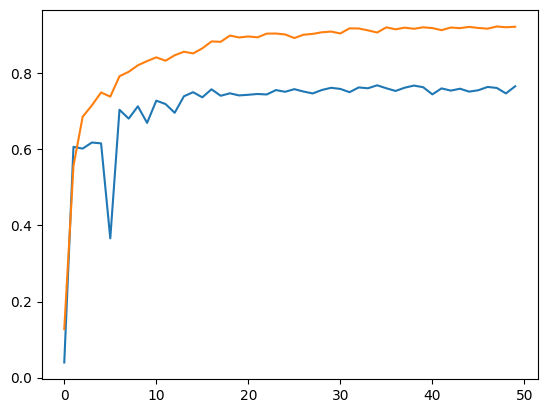

In [7]:
import matplotlib.pyplot as plt
plt.plot(seg.model.tml.metrics['val_f1'].history['micro'])
plt.plot(seg.model.tml.metrics['train_f1'].history['micro'])

In [ ]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
seg.train_model_ensemble(
    3,
    data
)

split into training: 9, valid: 3, and testing: 2
Training data:
0: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_1_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
2: B3_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
3: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
4: B5_CCI_1wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
5: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
6: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
7: R2_Sham_1wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
8: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
Validation data:
0: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
1: B4_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_2_stain-NF200.tiff
2: B5_CCI_1wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
Test data:
0: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_5_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Kernel size: 512


wandb: Currently logged in as: anmschulte (neu-sci) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Using 16bit Automatic Mixed Precision (AMP)
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Schulte_A\AppData\Local\anaconda3\envs\segmagic\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type        | Params 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 1 for best soft validation F1: 0.6057466268539429


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 2 for best soft validation F1: 0.7901870012283325


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 6 for best soft validation F1: 0.802238404750824


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 11 for best soft validation F1: 0.8040240406990051


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 13 for best soft validation F1: 0.8115687370300293


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 16 for best soft validation F1: 0.811909556388855


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 17 for best soft validation F1: 0.8197240233421326


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 18 for best soft validation F1: 0.8246161341667175


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 29 for best soft validation F1: 0.8261053562164307


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 33 for best soft validation F1: 0.8277939558029175


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 34 for best soft validation F1: 0.8327544331550598


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 35 for best soft validation F1: 0.8354853987693787


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


split into training: 9, valid: 3, and testing: 2
Training data:
0: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
1: B5_CCI_1wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
2: R2_Sham_1wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
3: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
4: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_1_stain-NF200.tiff
5: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
6: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
7: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
8: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Validation data:
0: B3_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
1: B4_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_2_stain-NF200.tiff
2: B5_CCI_1wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
Test data:
0: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_5_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Kernel size: 512


Using 16bit Automatic Mixed Precision (AMP)
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type        | Params | Mode 
----------------------------------------------
0 | model | Segformer   | 21.9 M | train
1 | loss  | DiceBCELoss | 0      | train
----------------------------------------------
21.9 M    Trainable params
0         Non-trainable params
21.9 M    Total params
87.481    Total estimated model params size (MB)
139       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 1 for best soft validation F1: 0.649013102054596


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 2 for best soft validation F1: 0.7539745569229126


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 3 for best soft validation F1: 0.7773258090019226


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 5 for best soft validation F1: 0.7836267352104187


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 7 for best soft validation F1: 0.7960914969444275


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 12 for best soft validation F1: 0.8068771362304688


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 14 for best soft validation F1: 0.8228691220283508


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 20 for best soft validation F1: 0.824884831905365


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 21 for best soft validation F1: 0.8270648121833801


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 22 for best soft validation F1: 0.8316953182220459


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 28 for best soft validation F1: 0.8372930288314819


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 38 for best soft validation F1: 0.8390301465988159


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 47 for best soft validation F1: 0.8416296243667603


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


split into training: 9, valid: 3, and testing: 2
Training data:
0: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
2: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_1_stain-NF200.tiff
3: B4_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_2_stain-NF200.tiff
4: R2_Sham_1wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
5: B3_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
6: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
7: B5_CCI_1wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
8: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
Validation data:
0: B5_CCI_1wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
1: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
2: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Test data:
0: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_5_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Kernel size: 512


Using 16bit Automatic Mixed Precision (AMP)
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type        | Params | Mode 
----------------------------------------------
0 | model | Segformer   | 21.9 M | train
1 | loss  | DiceBCELoss | 0      | train
----------------------------------------------
21.9 M    Trainable params
0         Non-trainable params
21.9 M    Total params
87.481    Total estimated model params size (MB)
139       Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 1 for best soft validation F1: 0.6306806802749634


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 2 for best soft validation F1: 0.728209912776947


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 5 for best soft validation F1: 0.7558217644691467


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 6 for best soft validation F1: 0.768818736076355


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 7 for best soft validation F1: 0.7821774482727051


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 10 for best soft validation F1: 0.7871831059455872


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 11 for best soft validation F1: 0.7967053055763245


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 28 for best soft validation F1: 0.8002527952194214


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 35 for best soft validation F1: 0.8025891780853271


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 47 for best soft validation F1: 0.8092532753944397


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


### Testing model
#### Test results are stored under 'base_path'/Testing

Loaded model from S:\NL\all\AG Blum\Annemarie\Xenium\Annotation\models\best_model.pth
Using single model for prediction


  0%|          | 0/9 [00:00<?, ?it/s]

Neuron


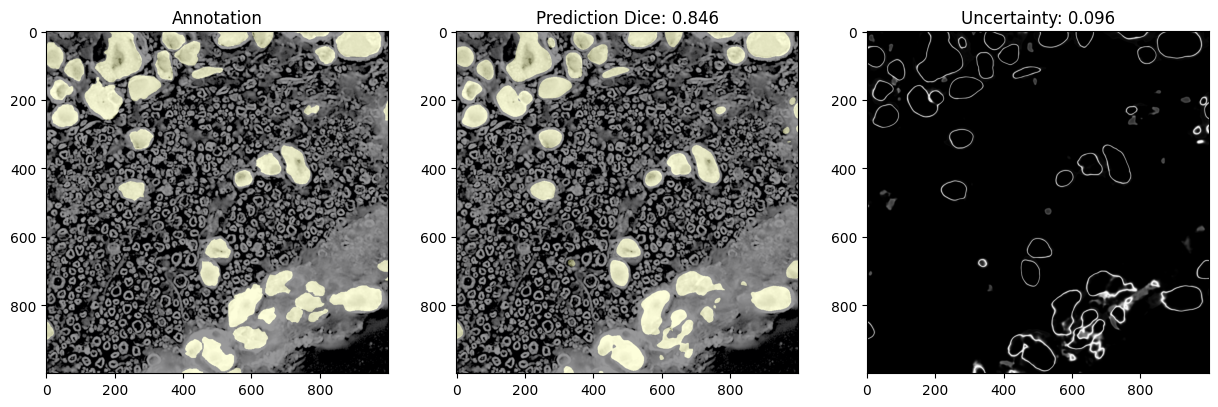

SGC


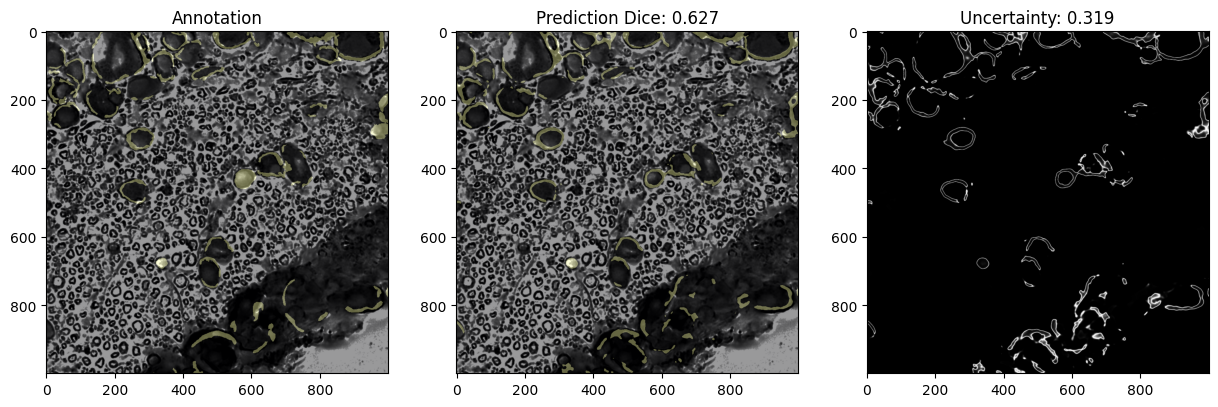

Endothel


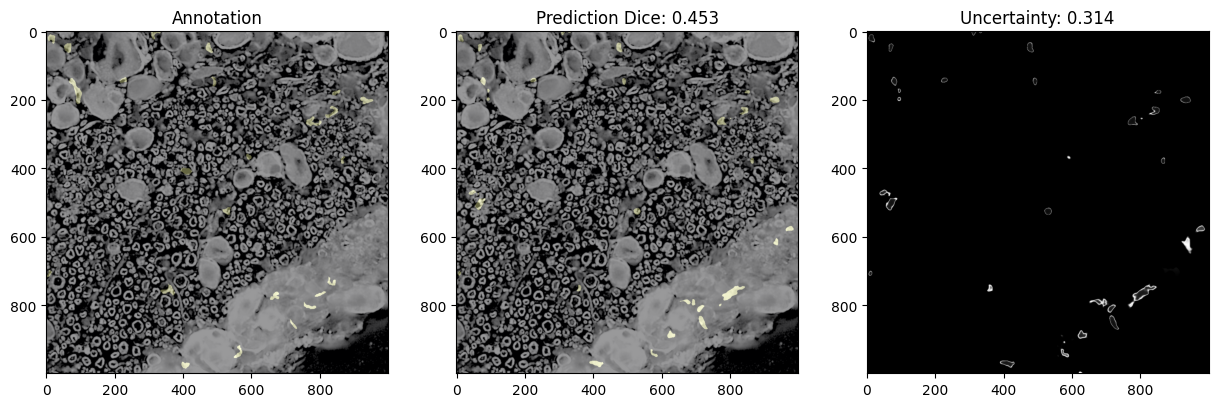

In [20]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
################## chose image to predict ##################
seg.test_images(data)
#seg.predict_image(image_to_predict, labels,show=True)

Loading models for ensemble


  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

0


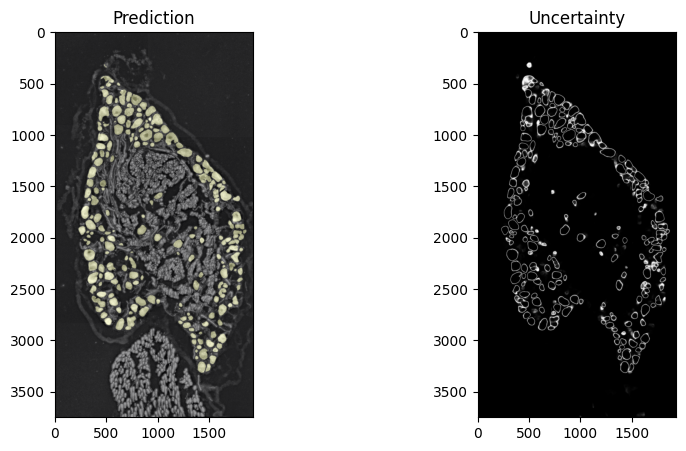

  0%|          | 0/77 [00:00<?, ?it/s]

0


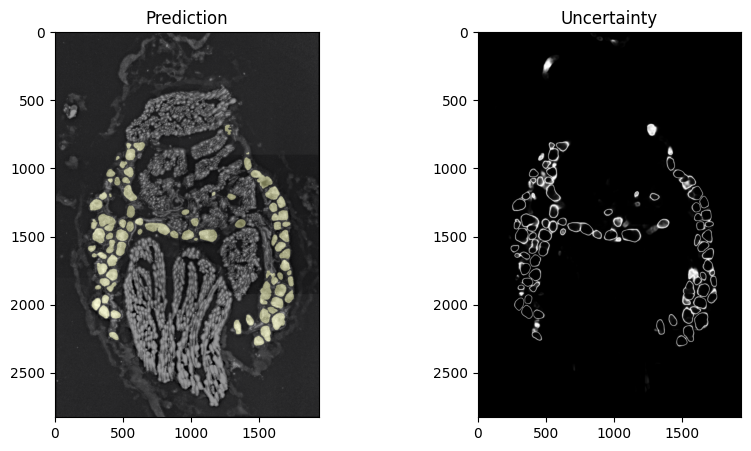

  0%|          | 0/16 [00:00<?, ?it/s]

0


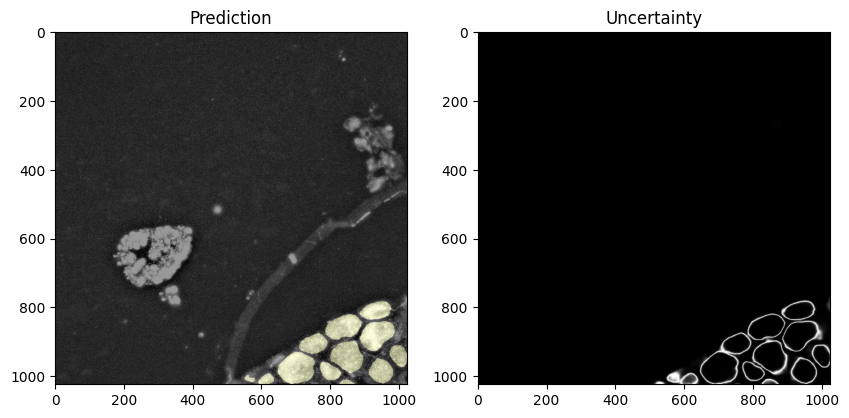

  0%|          | 0/121 [00:00<?, ?it/s]

0


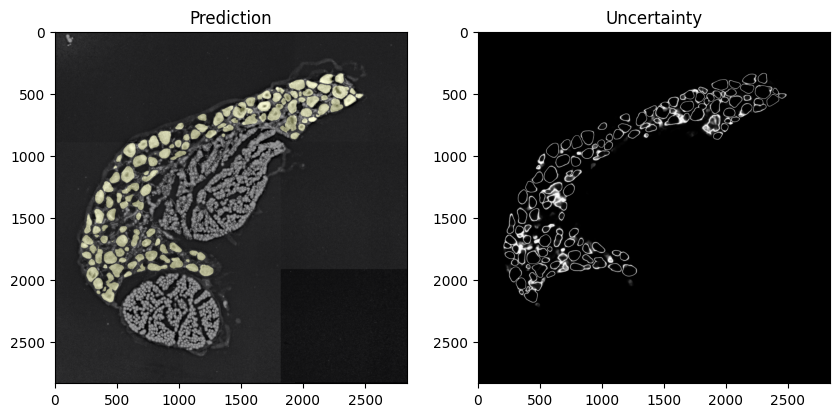

  0%|          | 0/121 [00:00<?, ?it/s]

0


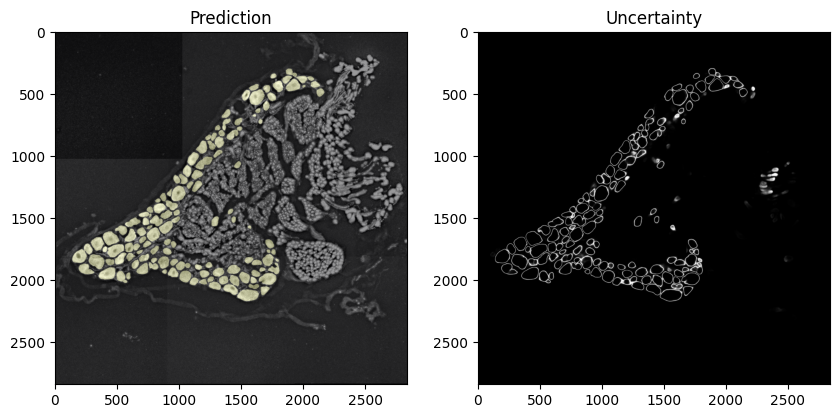

  0%|          | 0/154 [00:00<?, ?it/s]

0


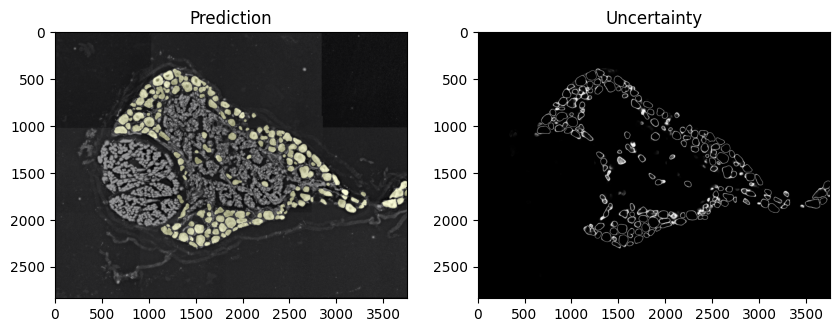

  0%|          | 0/154 [00:00<?, ?it/s]

0


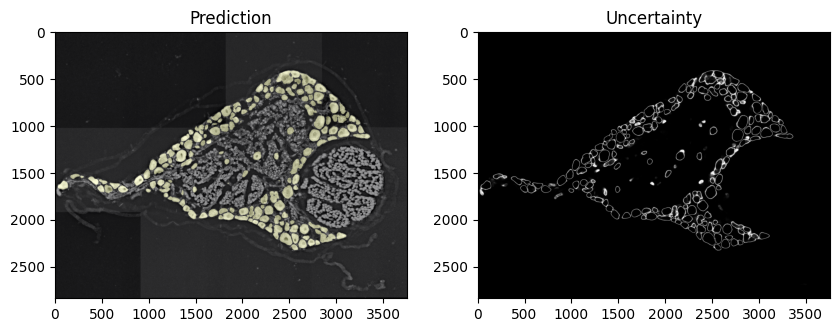

  0%|          | 0/77 [00:00<?, ?it/s]

0


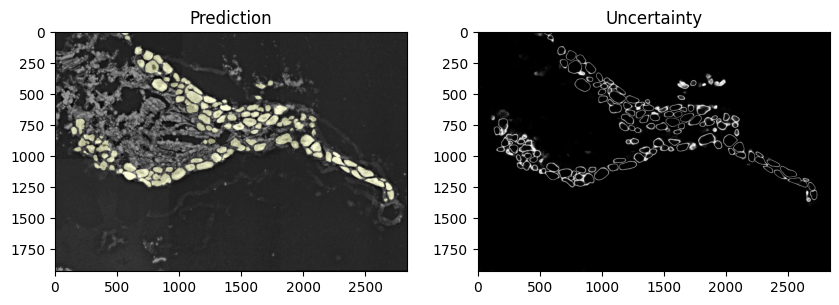

  0%|          | 0/121 [00:00<?, ?it/s]

0


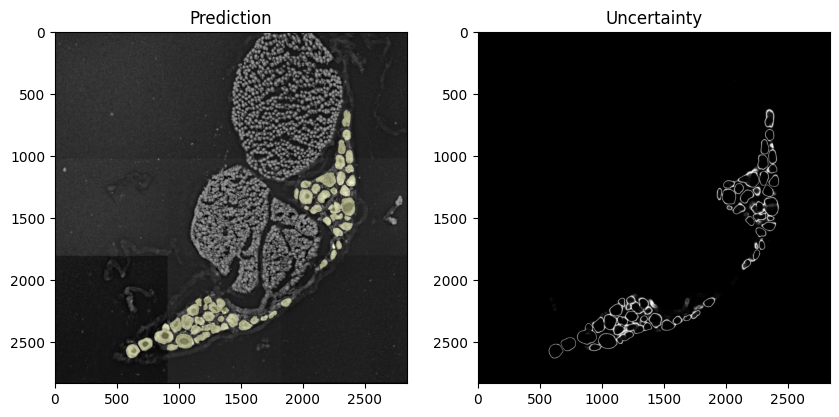

  0%|          | 0/154 [00:00<?, ?it/s]

0


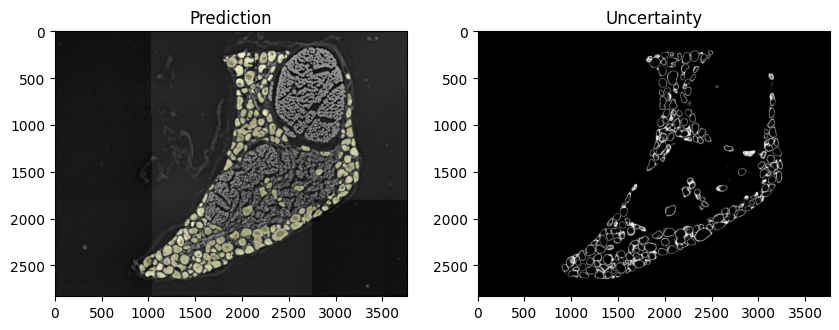

  0%|          | 0/98 [00:00<?, ?it/s]

0


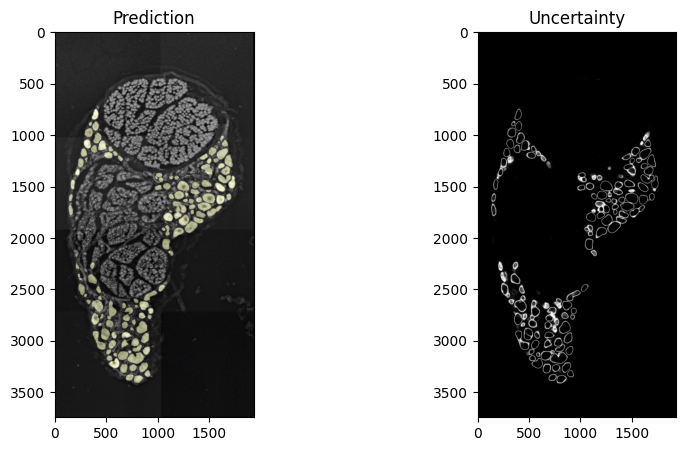

  0%|          | 0/49 [00:00<?, ?it/s]

0


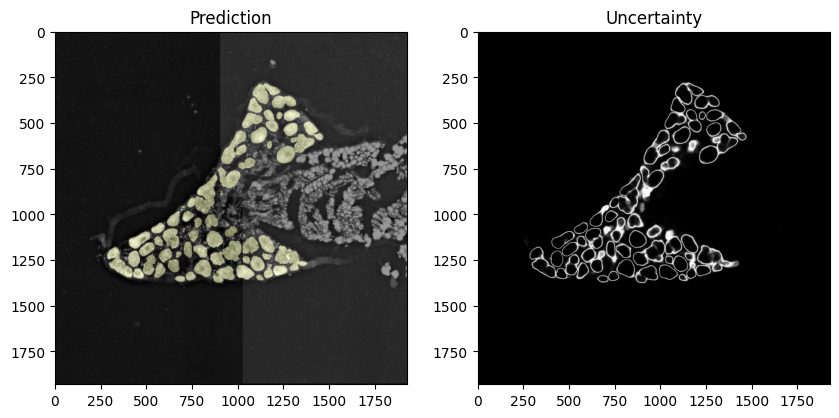

  0%|          | 0/198 [00:00<?, ?it/s]

0


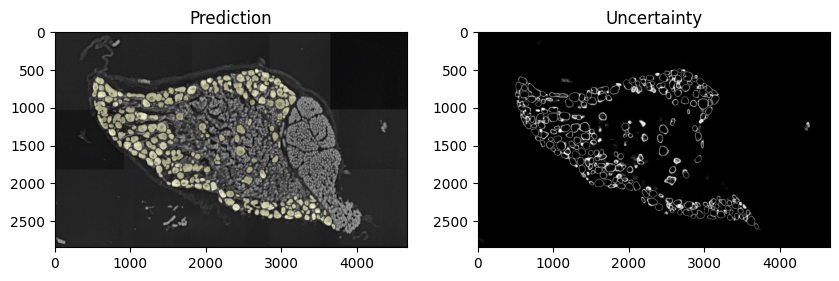

  0%|          | 0/121 [00:00<?, ?it/s]

0


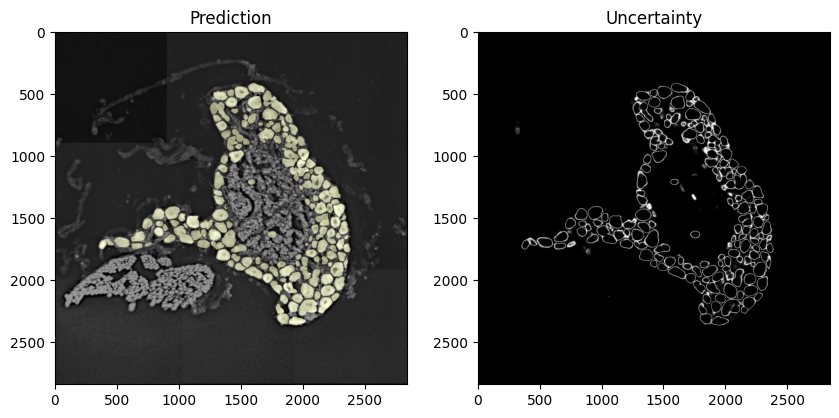

In [ ]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
################## chose image to predict ##################
folder_path = r'L:\Robert Blum\GPU PC Backup\Annotations\NF_mouse\Segmagic\Images'
labels = ['NF']
seg.predict_folder(folder_path, labels, show=True)

In [8]:
from segmagic_ml import Segmagic
seg = Segmagic(settings)
folder_path = r"F:\Xenium\Annotations_cells\images"
labels = ['Neuron', 'SGC', 'Endothel']
seg.predict_folder(folder_path, labels, show=False)

Loaded model from S:\NL\all\AG Blum\Annemarie\Xenium\Annotation\models\best_model.pth


  0%|          | 0/7 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/266 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/156 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/120 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/195 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/323 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/280 [00:00<?, ?it/s]

Using single model for prediction


  0%|          | 0/204 [00:00<?, ?it/s]